In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_pickle('data_loading_and_preprocessing.pkl')

In [3]:
data

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

# Feature Engineering

In [4]:
# Handling outlier 

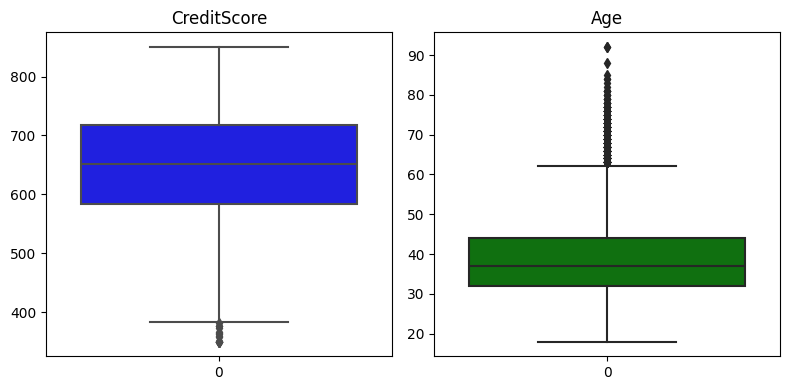

In [5]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['CreditScore'], color="blue")
plt.title("CreditScore")

plt.subplot(1, 2, 2)
sns.boxplot(data['Age'], color="green")
plt.title("Age")

plt.tight_layout()
plt.show()

In [6]:
# Handling outliers for CreditScore column 

In [7]:
Q1 = data['CreditScore'].quantile(0.25)
Q3 = data['CreditScore'].quantile(0.75)
IQR = Q3 -Q1 
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR

In [8]:
data[data['CreditScore'] < l]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7             376   Germany  Female   29       4  115046.74              4   
942           376    France  Female   46       6       0.00              1   
1193          363     Spain  Female   28       6  146098.43              3   
1405          359    France  Female   44       6  128747.69              1   
1631          350     Spain    Male   54       1  152677.48              1   
1838          350   Germany    Male   39       0  109733.20              2   
1962          358     Spain  Female   52       8  143542.36              3   
2473          351   Germany  Female   57       4  163146.46              1   
2579          365   Germany    Male   30       0  127760.07              1   
8154          367     Spain    Male   42       6   93608.28              1   
8723          350    France    Male   51      10       0.00              1   
8762          350    France  Female   60       3       0.00              1   
9210          382     Spain    Male   36       0       0.00              1   
9356          373    France    Male   42       7       0.00              1   
9624          350    France  Female   40       0  111098.85              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
7             1               0        119346.88       1  
942           1               0        157333.69       1  
1193          1               0        100615.14       1  
1405          1               0        146955.71       1  
1631          1               1        191973.49       1  
1838          0               0        123602.11       1  
1962          1               0        141959.11       1  
2473          1               0        169621.69       1  
2579          1               0         81537.85       1  
8154          1               0        168816.73       1  
8723          1               1        125823.79       1  
8762          0               0        113796.15       1  
9210          1               1        179540.73       1  
9356          1               0         77786.37       1  
9624          1               1        172321.21       1

In [9]:
data[data['CreditScore'] > u]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [10]:
data.loc[data['CreditScore'] < l, 'CreditScore' ] = data['CreditScore'].median()

In [11]:
data[data['CreditScore'] < l]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [12]:
# Handling outliers for Age column 

In [13]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1 
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR

In [14]:
data[data['Age'] < l]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [15]:
data[data['Age'] > u]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
58            511     Spain  Female   66       4       0.00              1   
85            652     Spain  Female   75      10       0.00              2   
104           670     Spain  Female   65       1       0.00              1   
158           646    France  Female   73       6   97259.25              1   
181           510    France    Male   65       2       0.00              2   
...           ...       ...     ...  ...     ...        ...            ...   
9753          656   Germany    Male   68       7  153545.11              1   
9765          445    France    Male   64       2  136770.67              1   
9832          595   Germany  Female   64       2  105736.32              1   
9894          521    France  Female   77       6       0.00              2   
9936          609    France    Male   77       1       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
58            1               0          1643.11       1  
85            1               1        114675.75       0  
104           1               1        177655.68       1  
158           0               1        104719.66       0  
181           1               1         48071.61       0  
...         ...             ...              ...     ...  
9753          1               1        186574.68       0  
9765          0               1         43678.06       0  
9832          1               1         89935.73       1  
9894          1               1         49054.10       0  
9936          0               1         18708.76       0  

[359 rows x 11 columns]

In [16]:
data.loc[data['Age'] > u, 'Age'] = data['Age'].median()

In [17]:
data[data['Age']> u]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [18]:
# Handling categorical features using one hot encoding 

In [19]:
Geography = pd.get_dummies(data['Geography'],dtype = int)

In [20]:
Gender = pd.get_dummies(data['Gender'],dtype = int)

In [21]:
# droping the previous columns 

In [22]:
data.drop(['Geography','Gender'],axis = 1 , inplace = True)

In [23]:
# concatinating new columns with data

In [24]:
data = pd.concat([Geography,Gender,data],axis =1)

In [25]:
data

France  Germany  Spain  Female  Male  CreditScore  Age  Tenure  \
0          1        0      0       1     0          619   42       2   
1          0        0      1       1     0          608   41       1   
2          1        0      0       1     0          502   42       8   
3          1        0      0       1     0          699   39       1   
4          0        0      1       1     0          850   43       2   
...      ...      ...    ...     ...   ...          ...  ...     ...   
9995       1        0      0       0     1          771   39       5   
9996       1        0      0       0     1          516   35      10   
9997       1        0      0       1     0          709   36       7   
9998       0        1      0       0     1          772   42       3   
9999       1        0      0       1     0          792   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 14 columns]

In [26]:
# applying standard scaler to particular columns

In [27]:
cols_to_scale = ['CreditScore', 'Age','Tenure','Balance','EstimatedSalary']

scaler = StandardScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [28]:
data

France  Germany  Spain  Female  Male  CreditScore       Age    Tenure  \
0          1        0      0       1     0    -0.332983  0.490105 -1.041760   
1          0        0      1       1     0    -0.447572  0.374424 -1.387538   
2          1        0      0       1     0    -1.551792  0.490105  1.032908   
3          1        0      0       1     0     0.500391  0.143063 -1.387538   
4          0        0      1       1     0     2.073384  0.605786 -1.041760   
...      ...      ...    ...     ...   ...          ...       ...       ...   
9995       1        0      0       0     1     1.250427  0.143063 -0.004426   
9996       1        0      0       0     1    -1.405951 -0.319661  1.724464   
9997       1        0      0       1     0     0.604563 -0.203980  0.687130   
9998       0        1      0       0     1     1.260844  0.490105 -0.695982   
9999       1        0      0       1     0     1.469188 -1.129427 -0.350204   

       Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0    -1.225848              1          1               1         0.021886   
1     0.117350              1          0               1         0.216534   
2     1.333053              3          1               0         0.240687   
3    -1.225848              2          0               0        -0.108918   
4     0.785728              1          1               1        -0.365276   
...        ...            ...        ...             ...              ...   
9995 -1.225848              2          1               0        -0.066419   
9996 -0.306379              1          1               1         0.027988   
9997 -1.225848              1          0               1        -1.008643   
9998 -0.022608              2          1               0        -0.125231   
9999  0.859965              1          1               0        -1.076370   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 14 columns]

In [29]:
data.to_pickle('data_feature_engineering.pkl')